### Analyze traffic data to identify patterns related to road conditions,weather,and time of day.visualize accident hotspot and contibuting factors 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r'E:\Download\US_Accidents_March23.csv\US_Accidents_March23.csv')
df

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.010,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.010,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.010,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.010,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.010,...,False,False,False,False,True,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7728389,A-7777757,Source1,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.002480,-117.379360,33.99888,-117.37094,0.543,...,False,False,False,False,False,False,Day,Day,Day,Day
7728390,A-7777758,Source1,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.766960,-117.148060,32.76555,-117.15363,0.338,...,False,False,False,False,False,False,Day,Day,Day,Day
7728391,A-7777759,Source1,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.775450,-117.847790,33.77740,-117.85727,0.561,...,False,False,False,False,False,False,Day,Day,Day,Day
7728392,A-7777760,Source1,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.992460,-118.403020,33.98311,-118.39565,0.772,...,False,False,False,False,False,False,Day,Day,Day,Day


In [3]:
df.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

In [5]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,7.728394e+06,7.728394e+06,7.728394e+06,4.325632e+06,4.325632e+06,7.728394e+06,7.564541e+06,5.729375e+06,7.554250e+06,7.587715e+06,7.551296e+06,7.157161e+06,5.524808e+06
mean,2.212384e+00,3.620119e+01,-9.470255e+01,3.626183e+01,-9.572557e+01,5.618423e-01,6.166329e+01,5.825105e+01,6.483104e+01,2.953899e+01,9.090376e+00,7.685490e+00,8.407210e-03
std,4.875313e-01,5.076079e+00,1.739176e+01,5.272905e+00,1.810793e+01,1.776811e+00,1.901365e+01,2.238983e+01,2.282097e+01,1.006190e+00,2.688316e+00,5.424983e+00,1.102246e-01
min,1.000000e+00,2.455480e+01,-1.246238e+02,2.456601e+01,-1.245457e+02,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.339963e+01,-1.172194e+02,3.346207e+01,-1.177543e+02,0.000000e+00,4.900000e+01,4.300000e+01,4.800000e+01,2.937000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.000000e+00,3.582397e+01,-8.776662e+01,3.618349e+01,-8.802789e+01,3.000000e-02,6.400000e+01,6.200000e+01,6.700000e+01,2.986000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.008496e+01,-8.035368e+01,4.017892e+01,-8.024709e+01,4.640000e-01,7.600000e+01,7.500000e+01,8.400000e+01,3.003000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.000000e+00,4.900220e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,4.417500e+02,2.070000e+02,2.070000e+02,1.000000e+02,5.863000e+01,1.400000e+02,1.087000e+03,3.647000e+01


In [6]:
df.State.unique

<bound method Series.unique of 0          OH
1          OH
2          OH
3          OH
4          OH
           ..
7728389    CA
7728390    CA
7728391    CA
7728392    CA
7728393    CA
Name: State, Length: 7728394, dtype: object>

In [7]:
data=df[df['State']=='CA']

In [8]:
data['IDD'] = data['ID'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)

C:\Users\venka\AppData\Local\Temp\ipykernel_6380\2902001698.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['IDD'] = data['ID'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)


In [9]:
data

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,IDD
728,A-729,Source2,3,2016-06-21 10:34:40,2016-06-21 11:04:40,38.085300,-122.233017,NaN,NaN,0.000,...,False,False,False,False,False,Day,Day,Day,Day,729
729,A-730,Source2,3,2016-06-21 10:30:16,2016-06-21 11:16:39,37.631813,-122.084167,NaN,NaN,0.000,...,False,False,False,False,False,Day,Day,Day,Day,730
730,A-731,Source2,2,2016-06-21 10:49:14,2016-06-21 11:19:14,37.896564,-122.070717,NaN,NaN,0.000,...,False,False,False,False,False,Day,Day,Day,Day,731
731,A-732,Source2,3,2016-06-21 10:41:42,2016-06-21 11:11:42,37.334255,-122.032471,NaN,NaN,0.000,...,False,False,False,False,False,Day,Day,Day,Day,732
732,A-733,Source2,2,2016-06-21 10:16:26,2016-06-21 11:04:16,37.250729,-121.910713,NaN,NaN,0.000,...,False,False,False,False,False,Day,Day,Day,Day,733
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7728389,A-7777757,Source1,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.002480,-117.379360,33.99888,-117.37094,0.543,...,False,False,False,False,False,Day,Day,Day,Day,7777757
7728390,A-7777758,Source1,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.766960,-117.148060,32.76555,-117.15363,0.338,...,False,False,False,False,False,Day,Day,Day,Day,7777758
7728391,A-7777759,Source1,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.775450,-117.847790,33.77740,-117.85727,0.561,...,False,False,False,False,False,Day,Day,Day,Day,7777759
7728392,A-7777760,Source1,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.992460,-118.403020,33.98311,-118.39565,0.772,...,False,False,False,False,False,Day,Day,Day,Day,7777760


#data['ID'].astype('int64')
#data['ID'] = data['ID'].astype(int)

In [10]:
data.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,IDD
728,A-729,Source2,3,2016-06-21 10:34:40,2016-06-21 11:04:40,38.085300,-122.233017,NaN,NaN,0.0,...,False,False,False,False,False,Day,Day,Day,Day,729
729,A-730,Source2,3,2016-06-21 10:30:16,2016-06-21 11:16:39,37.631813,-122.084167,NaN,NaN,0.0,...,False,False,False,False,False,Day,Day,Day,Day,730
730,A-731,Source2,2,2016-06-21 10:49:14,2016-06-21 11:19:14,37.896564,-122.070717,NaN,NaN,0.0,...,False,False,False,False,False,Day,Day,Day,Day,731
731,A-732,Source2,3,2016-06-21 10:41:42,2016-06-21 11:11:42,37.334255,-122.032471,NaN,NaN,0.0,...,False,False,False,False,False,Day,Day,Day,Day,732
732,A-733,Source2,2,2016-06-21 10:16:26,2016-06-21 11:04:16,37.250729,-121.910713,NaN,NaN,0.0,...,False,False,False,False,False,Day,Day,Day,Day,733


In [11]:
data.shape

(1741433, 47)

In [12]:
data.duplicated().sum()

0

In [13]:
data=data.dropna(subset=['Precipitation(in)','Temperature(F)','Wind_Chill(F)','Humidity(%)','Pressure(in)','Visibility(mi)','Wind_Direction', 'Wind_Speed(mph)',
                      'Weather_Condition'])

In [14]:
data.shape

(1123041, 47)

In [15]:
data.isna().sum()/len(data)*100

ID                        0.000000
Source                    0.000000
Severity                  0.000000
Start_Time                0.000000
End_Time                  0.000000
Start_Lat                 0.000000
Start_Lng                 0.000000
End_Lat                  21.367163
End_Lng                  21.367163
Distance(mi)              0.000000
Description               0.000178
Street                    0.197499
City                      0.000623
County                    0.000000
State                     0.000000
Zipcode                   0.000000
Country                   0.000000
Timezone                  0.000000
Airport_Code              0.000000
Weather_Timestamp         0.000000
Temperature(F)            0.000000
Wind_Chill(F)             0.000000
Humidity(%)               0.000000
Pressure(in)              0.000000
Visibility(mi)            0.000000
Wind_Direction            0.000000
Wind_Speed(mph)           0.000000
Precipitation(in)         0.000000
Weather_Condition   

In [16]:
data=data.dropna(subset=['City','Sunrise_Sunset',
       'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight','Description','Street' ])

In [17]:
data.isna().sum()/len(data)*100

ID                        0.00000
Source                    0.00000
Severity                  0.00000
Start_Time                0.00000
End_Time                  0.00000
Start_Lat                 0.00000
Start_Lng                 0.00000
End_Lat                  21.39374
End_Lng                  21.39374
Distance(mi)              0.00000
Description               0.00000
Street                    0.00000
City                      0.00000
County                    0.00000
State                     0.00000
Zipcode                   0.00000
Country                   0.00000
Timezone                  0.00000
Airport_Code              0.00000
Weather_Timestamp         0.00000
Temperature(F)            0.00000
Wind_Chill(F)             0.00000
Humidity(%)               0.00000
Pressure(in)              0.00000
Visibility(mi)            0.00000
Wind_Direction            0.00000
Wind_Speed(mph)           0.00000
Precipitation(in)         0.00000
Weather_Condition         0.00000
Amenity       

In [18]:
data['Weather_Condition'].value_counts()

Fair                            697542
Cloudy                          127451
Mostly Cloudy                    88327
Partly Cloudy                    70399
Light Rain                       35885
                                 ...  
Light Thunderstorms and Rain         2
Light Snow with Thunder              1
Sand / Windy                         1
Blowing Sand                         1
Partial Fog                          1
Name: Weather_Condition, Length: 70, dtype: int64

In [19]:
df_cat=data.select_dtypes('object')
df_num=data.select_dtypes(np.number)
df_cat=df_cat.drop('ID',axis=1)

In [20]:
df_cat=data.select_dtypes('object')
col_name=[]
length=[]

for i in df_cat.columns:
    col_name.append(i)
    length.append(len(df_cat[i].unique()))
df_2=pd.DataFrame(zip(col_name,length),columns=['feature','count_of_unique_values'])
df_2

,feature,count_of_unique_values
0,ID,1120080
1,Source,3
2,Start_Time,847163
3,End_Time,989821
4,Description,535670
5,Street,55572
6,City,1057
7,County,58
8,State,1
9,Zipcode,103961


In [21]:
data.drop(['Description','Zipcode','Weather_Timestamp'],axis=1,inplace=True)

In [22]:
del data['Airport_Code']


In [23]:
df_num.columns

Index(['Severity', 'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng',
       'Distance(mi)', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)',
       'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)',
       'Precipitation(in)', 'IDD'],
      dtype='object')

In [24]:
len(df_num.columns)

14

In [25]:
df_cat.columns

Index(['ID', 'Source', 'Start_Time', 'End_Time', 'Description', 'Street',
       'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Wind_Direction',
       'Weather_Condition', 'Sunrise_Sunset', 'Civil_Twilight',
       'Nautical_Twilight', 'Astronomical_Twilight'],
      dtype='object')

In [26]:
#bool_col.columns
#int_col.columns
#cat_col.head()

In [27]:
len(df['City'].unique())

13679

In [28]:
#cat_col
#num_col_1=df.select_dtypes('number')

### Numeric data

In [29]:
df_num=data.select_dtypes(np.number)
col_name=[]
length=[]

for i in df_num.columns:
    col_name.append(i)
    length.append(len(df_num[i].unique()))
df_2=pd.DataFrame(zip(col_name,length),columns=['feature','count_of_unique_values'])
df_2

,feature,count_of_unique_values
0,Severity,4
1,Start_Lat,368346
2,Start_Lng,372965
3,End_Lat,295344
4,End_Lng,299426
5,Distance(mi),12679
6,Temperature(F),157
7,Wind_Chill(F),317
8,Humidity(%),100
9,Pressure(in),807


<Axes: >

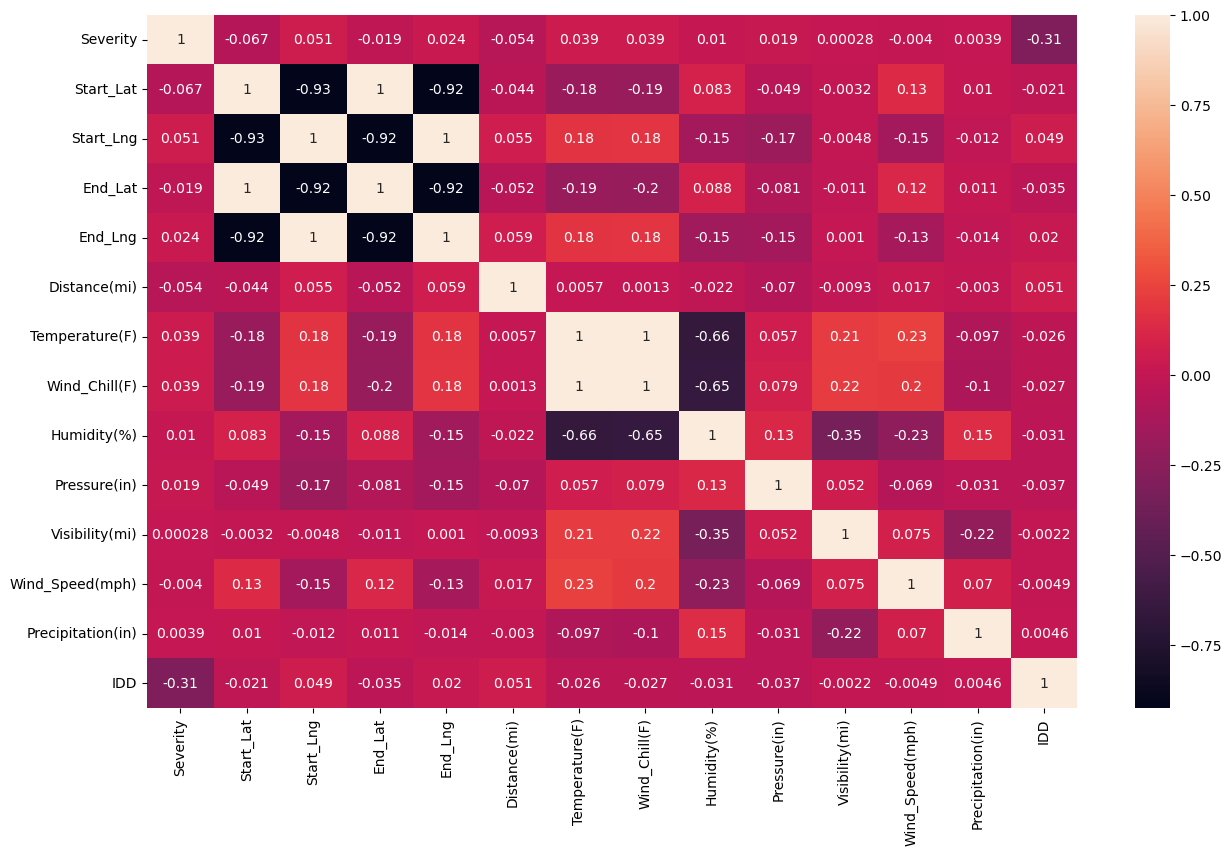

In [30]:
plt.figure(figsize=(15 ,9))
sns.heatmap(df_num.corr() , annot=True)

In [31]:
cities = data['City'].unique()
len(cities)

1057

In [32]:
accidents_by_cities = data['City'].value_counts()
accidents_by_cities

Los Angeles            104012
San Diego               39175
Sacramento              33976
Bakersfield             18957
Riverside               18694
                        ...  
Birds Lndg                  1
Santa Ysabel                1
Sylmar                      1
Oceanside-Escondido         1
Canyon Lake                 1
Name: City, Length: 1057, dtype: int64

In [33]:
#top 10 cities by number of accident
accidents_by_cities[:10]

Los Angeles       104012
San Diego          39175
Sacramento         33976
Bakersfield        18957
Riverside          18694
San Bernardino     16432
Oakland            14977
Fresno             14858
Anaheim            14468
Ontario            14166
Name: City, dtype: int64

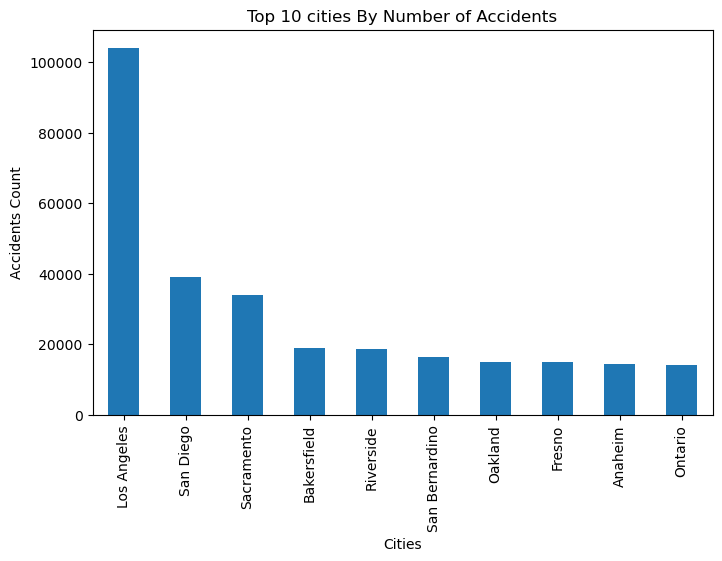

In [34]:
fig, ax = plt.subplots(figsize=(8,5))
accidents_by_cities[:10].plot(kind='bar')
ax.set(title = 'Top 10 cities By Number of Accidents',
       xlabel = 'Cities',
       ylabel = 'Accidents Count')
plt.show()

In [35]:
accidents_severity = data.groupby('Severity').count()['ID']
accidents_severity

Severity
1       8681
2    1021801
3      82294
4       7304
Name: ID, dtype: int64

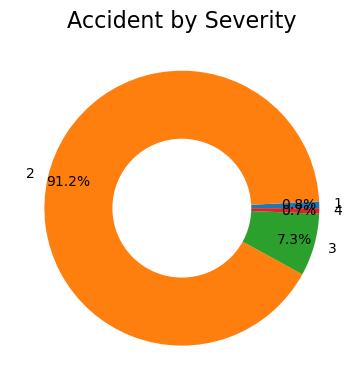

In [36]:
fig, ax = plt.subplots(figsize=(6, 4), subplot_kw=dict(aspect="equal"))
label = [1,2,3,4]
plt.pie(accidents_severity, labels=label,
        autopct='%1.1f%%', pctdistance=0.85)
circle = plt.Circle( (0,0), 0.5, color='white')
p=plt.gcf()
p.gca().add_artist(circle)
ax.set_title("Accident by Severity",fontdict={'fontsize': 16})
plt.tight_layout()
plt.show()

In [37]:
data['Start_Time'].dtypes
data['End_Time'].dtypes
data= data.astype({'Start_Time': 'datetime64[ns]', 'End_Time': 'datetime64[ns]'})
data['Start_Time'].dtypes

dtype('<M8[ns]')

In [38]:
data['Start_Time']
data['End_Time']
data['start_date'] = [d.date() for d in data['Start_Time']]
data['start_time'] = [d.time() for d in data['Start_Time']]
data['end_date'] = [d.date() for d in data['End_Time']]
data['end_time'] = [d.time() for d in data['End_Time']]

In [39]:
data['end_time']

6040       16:33:24
6044       17:29:10
6051       18:29:23
6052       18:45:54
6063       20:03:49
             ...   
7728389    18:32:01
7728390    19:38:23
7728391    19:28:49
7728392    19:29:42
7728393    19:21:31
Name: end_time, Length: 1120080, dtype: object

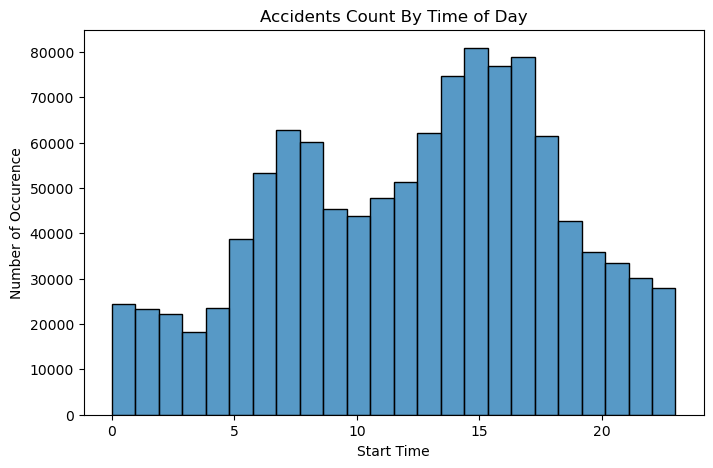

In [40]:
fig, ax = plt.subplots(figsize=(8,5))
sns.histplot(data['Start_Time'].dt.hour, bins = 24)

plt.xlabel("Start Time")
plt.ylabel("Number of Occurence")
plt.title('Accidents Count By Time of Day')

plt.show()

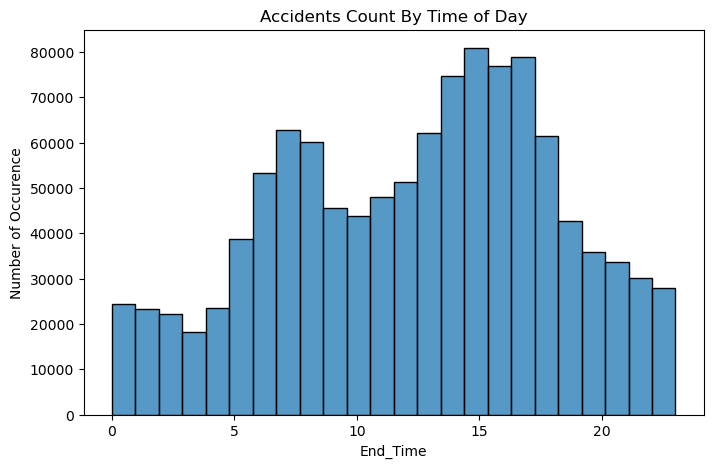

In [41]:
fig, ax = plt.subplots(figsize=(8,5))
sns.histplot(data['Start_Time'].dt.hour, bins = 24)

plt.xlabel("End_Time")
plt.ylabel("Number of Occurence")
plt.title('Accidents Count By Time of Day')

plt.show()

In [42]:
del data['Start_Time']
del data['End_Time']

In [43]:
%matplotlib inline
import os

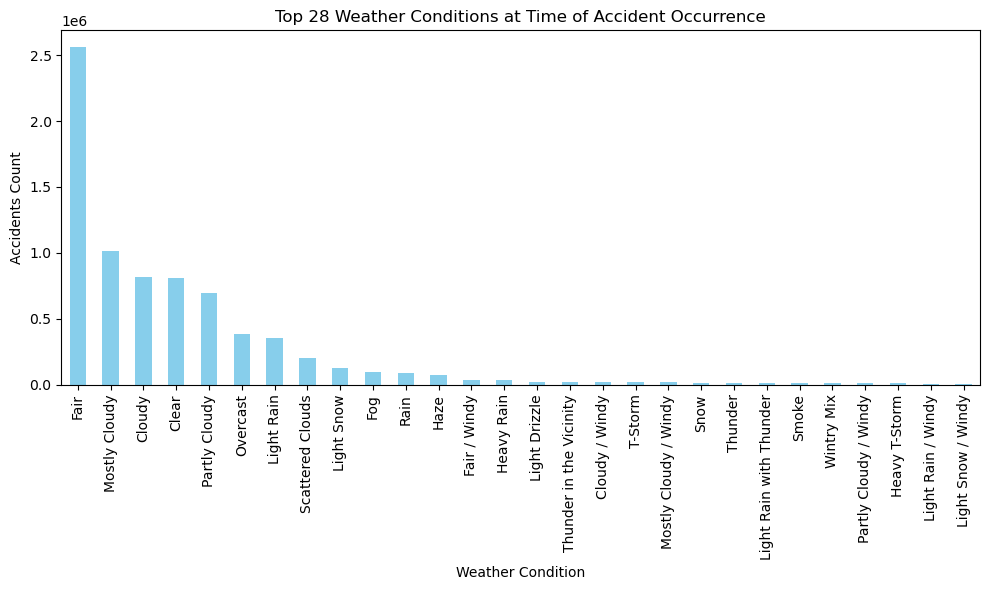

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame containing the data
fig, ax = plt.subplots(figsize=(10, 6))

# Count occurrences of each weather condition
weather_counts = df['Weather_Condition'].value_counts().head(28)

# Plot the bar plot
weather_counts.plot(kind='bar', ax=ax, color='skyblue')

# Set plot title and labels
ax.set(title='Top 28 Weather Conditions at Time of Accident Occurrence',
       xlabel='Weather Condition',
       ylabel='Accidents Count')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Show plot
plt.tight_layout()
plt.show()

### most accidents happened when the weather was 'fair'. Perhaps weather (bad weather) was not a big contributing factor to accidents.¶


In [45]:
#df_num.head()

In [46]:
 #Accidents by order of severity (1 being lowest, and 4 being highest)

df.groupby('Severity').count()['ID']

Severity
1      67366
2    6156981
3    1299337
4     204710
Name: ID, dtype: int64

<Axes: xlabel='Severity', ylabel='Start_Lat'>

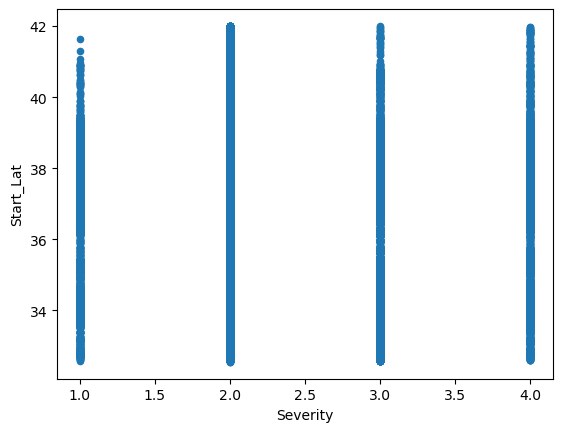

In [47]:
df_num.plot(kind='scatter', y='Start_Lat', x='Severity')


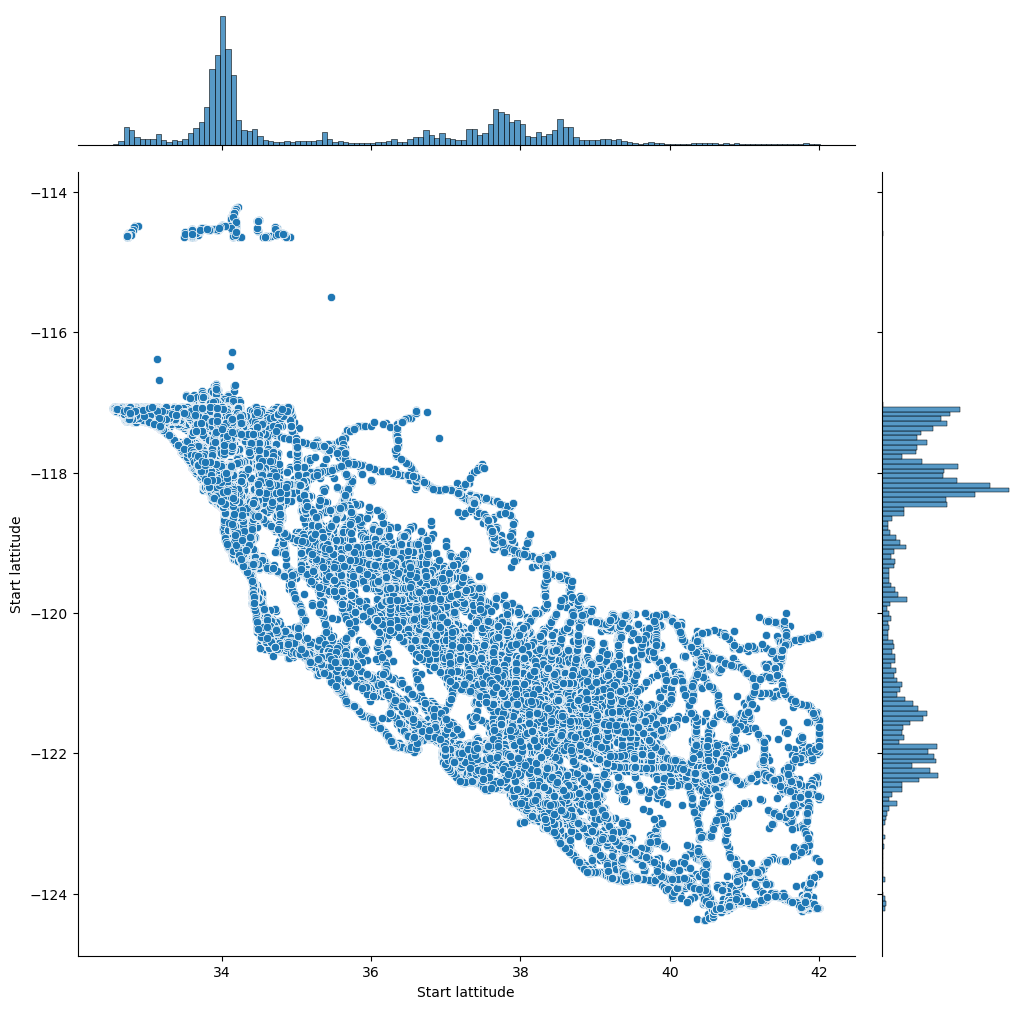

In [50]:
sns.jointplot(x=df_num.Start_Lat.values , y=df_num.Start_Lng.values,height=10)
plt.ylabel('Start lattitude', fontsize=10)
plt.xlabel('Start lattitude', fontsize=10)
plt.show()

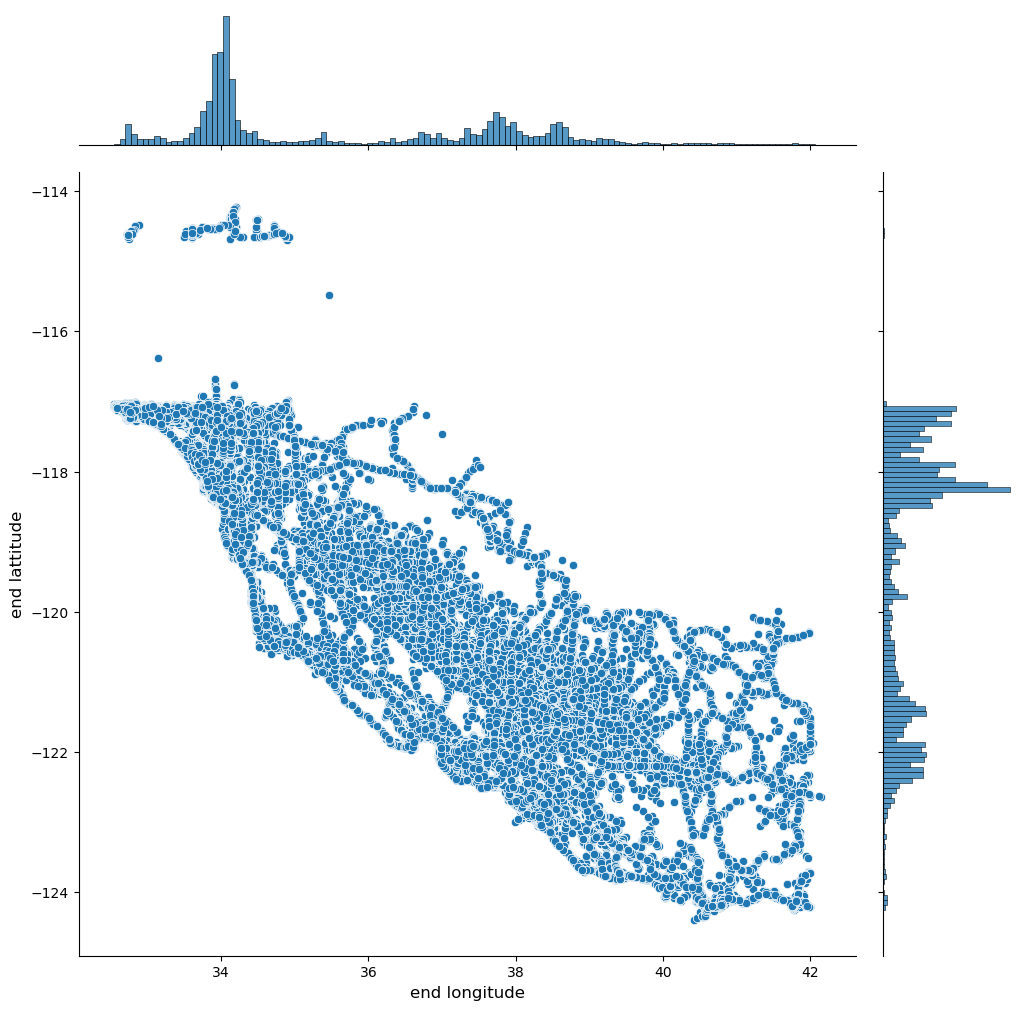

In [49]:
sns.jointplot(x=df_num.End_Lat.values , y=df_num.End_Lng.values,height=10)
plt.ylabel('end lattitude', fontsize=12)
plt.xlabel('end longitude', fontsize=12)
plt.show()